# Analytic Solution (LS) Without Target Included as an Input

In [1]:
import numpy as np
import pandas as pd
# from sklearn.datasets import fetch_openml
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
# from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
data = datasets.load_boston(return_X_y=False)
print(data.DESCR)
df = pd.DataFrame(np.hstack((data.data,data.target[:,np.newaxis])),
                  columns=np.hstack((data.feature_names,['House Value'])))
df

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House Value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [3]:
X = df.drop('House Value', axis=1)
y = df['House Value']

X.shape, y.shape

((506, 13), (506,))

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Results for Least Squares with Regularization:


,Alpha (Regularization Strength),MSE (Ridge),R-2 (Ridge),Variance (Ridge),MSE (Lasso),R-2 (Lasso),Variance (Lasso),MSE (Elastic),R-2 (Elastic),Variance (Elastic)
0,0.0000,20.724023,0.726157,0.000000e+00,20.724023,0.726157,0.000000e+00,20.724023,0.726157,0.000000e+00
1,0.0001,20.724026,0.726157,2.000001e-12,20.724309,0.726153,2.040177e-08,20.724645,0.726149,9.665430e-08
2,0.0010,20.724052,0.726157,1.617794e-10,20.726890,0.726119,1.662563e-06,20.730277,0.726074,7.911047e-06
3,0.0100,20.724306,0.726153,1.404298e-08,20.761331,0.725664,2.477293e-04,20.791357,0.725267,7.991488e-04
4,0.1000,20.726853,0.726120,1.222427e-06,21.853021,0.711239,2.005017e-01,21.614785,0.714387,1.223592e-01
5,1.0000,20.752416,0.725782,1.080807e-04,26.166377,0.654243,3.934874e+00,27.140175,0.641375,5.480812e+00
6,0.5000,20.738197,0.725970,1.023783e-04,24.632242,0.674515,4.337039e+00,24.280321,0.679165,5.360385e+00
7,10.0000,21.001466,0.722491,8.117032e-03,77.439660,-0.023271,3.372192e+02,71.234374,0.058724,2.667412e+02
8,100.0000,22.954033,0.696690,4.807376e-01,77.439660,-0.023271,5.302659e+02,77.439660,-0.023271,4.745747e+02


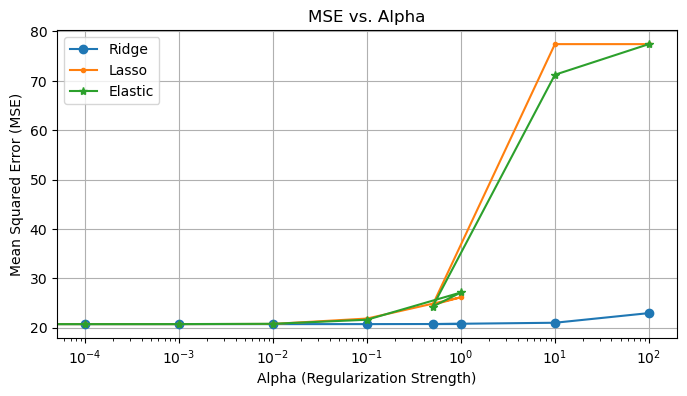

In [5]:
# Least Squares with different levels of regularization
alphas = [0, 0.0001, 0.001, 0.01, 0.1, 1, 0.5, 10, 100]
mse_values_ridge = []
r2_values_ridge = []
var_values_ridge = []
mse_values_lasso = []
r2_values_lasso = []
var_values_lasso = []
mse_values_elastic = []
r2_values_elastic = []
var_values_elastic = []

for alpha in alphas:
    model1 = Ridge(alpha=alpha)
    model1.fit(X_train, y_train)
    y_pred_ridge = model1.predict(X_test)
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    r2_ridge = r2_score(y_test, y_pred_ridge)
    mse_values_ridge.append(mse_ridge)
    r2_values_ridge.append(r2_ridge)
    std_ridge = np.std(mse_values_ridge)
    var_ridge = std_ridge*std_ridge
    var_values_ridge.append(var_ridge)
    
    model2 = Lasso(alpha=alpha)
    model2.fit(X_train, y_train)
    y_pred_lasso = model2.predict(X_test)
    mse_lasso = mean_squared_error(y_test, y_pred_lasso)
    r2_lasso = r2_score(y_test, y_pred_lasso)
    mse_values_lasso.append(mse_lasso)
    r2_values_lasso.append(r2_lasso)
    std_lasso = np.std(mse_values_lasso)
    var_lasso = std_lasso*std_lasso
    var_values_lasso.append(var_lasso)
    
    model3 = ElasticNet(alpha=alpha)
    model3.fit(X_train, y_train)
    y_pred_elastic = model3.predict(X_test)
    mse_elastic = mean_squared_error(y_test, y_pred_elastic)
    r2_elastic = r2_score(y_test, y_pred_elastic)
    mse_values_elastic.append(mse_elastic)
    r2_values_elastic.append(r2_elastic)
    std_elastic = np.std(mse_values_elastic)
    var_elastic = std_elastic*std_elastic
    var_values_elastic.append(var_elastic)

ls_df = pd.DataFrame({
    'Alpha (Regularization Strength)': alphas,
    'MSE (Ridge)': mse_values_ridge,
    'R-2 (Ridge)': r2_values_ridge,
    'Variance (Ridge)': var_values_ridge,
    'MSE (Lasso)': mse_values_lasso,
    'R-2 (Lasso)': r2_values_lasso,
    'Variance (Lasso)': var_values_lasso,
    'MSE (Elastic)': mse_values_elastic,
    'R-2 (Elastic)': r2_values_elastic,
    'Variance (Elastic)': var_values_elastic
})

print("Results for Least Squares with Regularization:")
display(ls_df)

plt.figure(figsize=(8, 4))
plt.semilogx(alphas, mse_values_ridge, marker='o', label='Ridge')
plt.semilogx(alphas, mse_values_lasso, marker='.', label='Lasso')
plt.semilogx(alphas, mse_values_elastic, marker='*', label='Elastic')
plt.title('MSE vs. Alpha')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# Analytic Solution (LS) With Target Included as an Input

In [6]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Load the dataset
data = datasets.load_boston(return_X_y=False)
print(data.DESCR)
df = pd.DataFrame(np.hstack((data.data,data.target[:,np.newaxis])),
                  columns=np.hstack((data.feature_names,['House Value'])))
df

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House Value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [8]:
X = df
y = df['House Value']

X.shape, y.shape

((506, 14), (506,))

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Results for Least Squares with Regularization:


,Alpha (Regularization Strength),MSE (Ridge),R-2 (Ridge),Variance (Ridge),MSE (Lasso),R-2 (Lasso),Variance (Lasso),MSE (Elastic),R-2 (Elastic),Variance (Elastic)
0,0.0000,1.523494e-28,1.000000,0.000000e+00,4.797252e-06,1.000000,0.000000e+00,0.000005,1.000000,0.000000e+00
1,0.0001,2.651995e-11,1.000000,1.758270e-22,2.342190e-06,1.000000,1.506832e-12,0.000005,1.000000,1.974541e-14
2,0.0010,2.651914e-09,1.000000,1.547338e-18,8.855194e-07,1.000000,2.605652e-12,0.000079,0.999999,1.207792e-09
3,0.0100,2.651098e-07,1.000000,1.309065e-14,8.785548e-05,0.999999,1.362401e-09,0.006739,0.999911,8.441454e-06
4,0.1000,2.642966e-05,1.000000,1.112093e-10,8.785548e-03,0.999884,1.228353e-05,0.458045,0.993947,3.332583e-02
5,1.0000,2.564055e-03,0.999966,9.094014e-07,8.785548e-01,0.988391,1.067798e-01,8.411434,0.888853,9.638433e+00
6,0.5000,6.518404e-04,0.999991,7.854161e-07,2.196387e-01,0.997098,9.215558e-02,4.177931,0.944794,9.153206e+00
7,10.0000,1.957095e-01,0.997414,4.170182e-03,7.743966e+01,-0.023271,6.533153e+02,62.370075,0.175855,4.084175e+02
8,100.0000,4.569765e+00,0.939616,2.043813e+00,7.743966e+01,-0.023271,1.032344e+03,77.439660,-0.023271,8.198853e+02


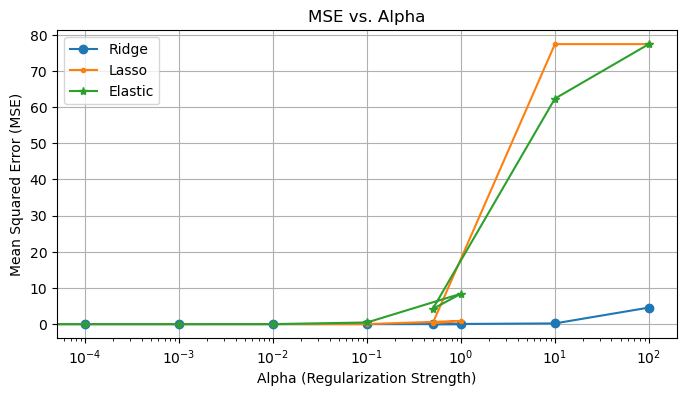

In [10]:
# Least Squares with different levels of regularization
alphas = [0, 0.0001, 0.001, 0.01, 0.1, 1, 0.5, 10, 100]
mse_values_ridge = []
r2_values_ridge = []
var_values_ridge = []
mse_values_lasso = []
r2_values_lasso = []
var_values_lasso = []
mse_values_elastic = []
r2_values_elastic = []
var_values_elastic = []

for alpha in alphas:
    model1 = Ridge(alpha=alpha)
    model1.fit(X_train, y_train)
    y_pred_ridge = model1.predict(X_test)
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    r2_ridge = r2_score(y_test, y_pred_ridge)
    mse_values_ridge.append(mse_ridge)
    r2_values_ridge.append(r2_ridge)
    std_ridge = np.std(mse_values_ridge)
    var_ridge = std_ridge*std_ridge
    var_values_ridge.append(var_ridge)
    
    model2 = Lasso(alpha=alpha)
    model2.fit(X_train, y_train)
    y_pred_lasso = model2.predict(X_test)
    mse_lasso = mean_squared_error(y_test, y_pred_lasso)
    r2_lasso = r2_score(y_test, y_pred_lasso)
    mse_values_lasso.append(mse_lasso)
    r2_values_lasso.append(r2_lasso)
    std_lasso = np.std(mse_values_lasso)
    var_lasso = std_lasso*std_lasso
    var_values_lasso.append(var_lasso)
    
    model3 = ElasticNet(alpha=alpha)
    model3.fit(X_train, y_train)
    y_pred_elastic = model3.predict(X_test)
    mse_elastic = mean_squared_error(y_test, y_pred_elastic)
    r2_elastic = r2_score(y_test, y_pred_elastic)
    mse_values_elastic.append(mse_elastic)
    r2_values_elastic.append(r2_elastic)
    std_elastic = np.std(mse_values_elastic)
    var_elastic = std_elastic*std_elastic
    var_values_elastic.append(var_elastic)

ls_df = pd.DataFrame({
    'Alpha (Regularization Strength)': alphas,
    'MSE (Ridge)': mse_values_ridge,
    'R-2 (Ridge)': r2_values_ridge,
    'Variance (Ridge)': var_values_ridge,
    'MSE (Lasso)': mse_values_lasso,
    'R-2 (Lasso)': r2_values_lasso,
    'Variance (Lasso)': var_values_lasso,
    'MSE (Elastic)': mse_values_elastic,
    'R-2 (Elastic)': r2_values_elastic,
    'Variance (Elastic)': var_values_elastic
})

print("Results for Least Squares with Regularization:")
display(ls_df)

plt.figure(figsize=(8, 4))
plt.semilogx(alphas, mse_values_ridge, marker='o', label='Ridge')
plt.semilogx(alphas, mse_values_lasso, marker='.', label='Lasso')
plt.semilogx(alphas, mse_values_elastic, marker='*', label='Elastic')
plt.title('MSE vs. Alpha')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# LMS Method

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
data = datasets.load_boston(return_X_y=False)
print(data.DESCR)
df = pd.DataFrame(np.hstack((data.data,data.target[:,np.newaxis])),
                  columns=np.hstack((data.feature_names,['House Value'])))
df

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House Value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [3]:
X = df.drop('House Value', axis=1)
y = df['House Value']

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((339, 13), (167, 13), (339,), (167,))

In [5]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [6]:
# # Bias term can be added here --> commented out to get results without a bias term
# X_train = np.c_[np.ones(X_train.shape[0]), X_train]
# X_test = np.c_[np.ones(X_test.shape[0]), X_test]
# X_train.shape, X_test.shape

In [7]:
# Initialize model parameters
m_params = np.zeros(X_train.shape[1])

# Initializing learning rate and number of iterations
# Values for learning rate are changed manually from [0, 0.0001, 0.001, 0.01, 0.1]
alpha = 0.1
iterations = 1000

In [8]:
# Defining MSE function to account for model parameters
def MSE(X, y, m_params):
    x = X.shape[0]
    y_pred = X.dot(m_params)
    mse = (1/(2*x)) * np.sum((y_pred-y)**2)
    return mse

In [9]:
# LMS gradient descent method
def lms(X, y, m_params, alpha, iterations):
    x = X.shape[0]
    J = np.zeros(iterations)
    weight_updates = []  # A way to store the weight updates
    for i in range(iterations):
        y_pred = X.dot(m_params)
        error = y_pred - y
        gradient = (1/x) * X.T.dot(error)
        m_params = m_params - alpha * gradient
        J[i] = MSE(X, y, m_params)
        weight_updates.append(m_params.copy())  # Append a copy of the current weights
    return m_params, J, weight_updates

Learned Model Parameters When Alpha = 0.1 
 [-0.98834982  0.86744848  0.40410036  0.86200079 -1.89989639  2.80831045
 -0.35880912 -3.045414    2.03016256 -1.36115926 -2.08245169  1.04123694
 -3.92619792]
Training MSE:  275.32125345175774
Testing MSE:  244.53893598750793


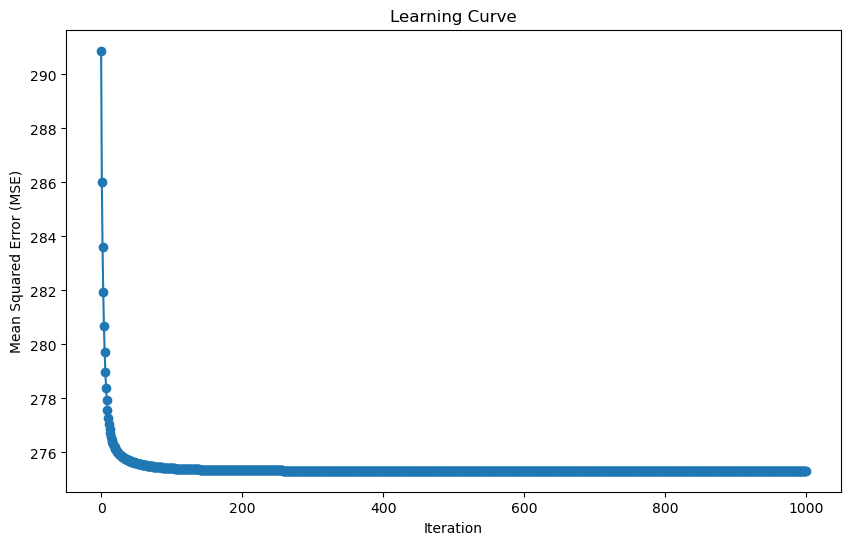

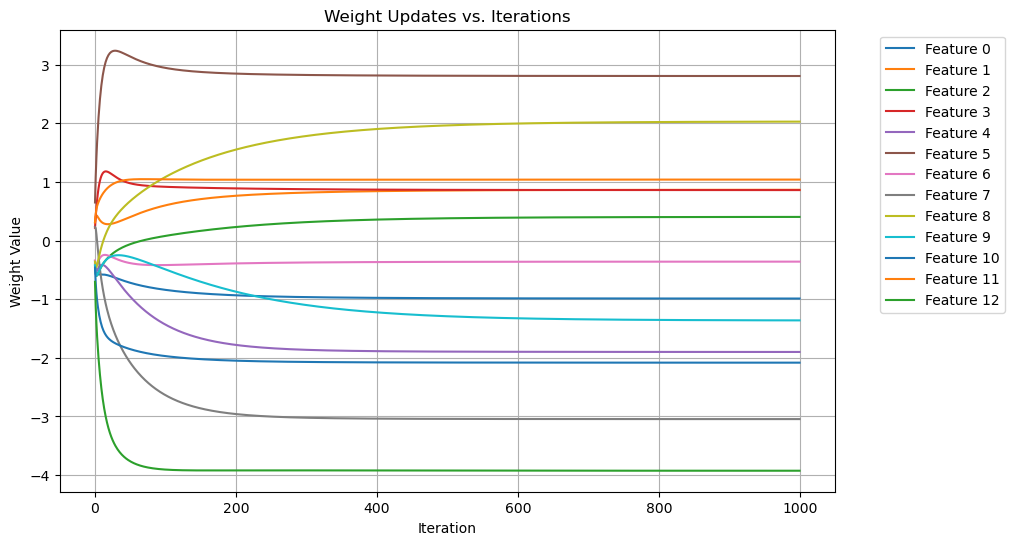

In [10]:
# Train the model using LMS method
m_params, J, weight_updates = lms(X_train, y_train, m_params, alpha, iterations)

# Print the learned model parameters
print(f"Learned Model Parameters When Alpha = {alpha} \n", m_params)

# Check the model on the training set
X_train_pred = X_train.dot(m_params)
X_train_mse = MSE(X_train, y_train, m_params)
print("Training MSE: ", X_train_mse)

# Check the model on the testing set
X_test_pred = X_test.dot(m_params)
X_test_mse = MSE(X_test, y_test, m_params)
print("Testing MSE: ", X_test_mse)

# Plot the learning curve (cost function vs. iterations)
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), J, marker='o', linestyle='-')
plt.title('Learning Curve')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()

# Plot weight updates over iterations
weight_updates = np.array(weight_updates)  # Convert weight update list to a NumPy array
plt.figure(figsize=(10, 6))
for feature in range(weight_updates.shape[1]): # Iterate over every feature in the weight updates array and plot
    plt.plot(range(iterations), weight_updates[:, feature], label=f'Feature {feature}')
plt.title('Weight Updates vs. Iterations')
plt.xlabel('Iteration')
plt.ylabel('Weight Value')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid(True)
plt.show()

# Experimenting

In [11]:
# # Least Mean Squares (Gradient Descent) with different learning rates
# learning_rates = [0.0001, 0.001, 0.01, 0.1]
# mse_values = []
# weight_history = []

# for lr in learning_rates:
#     model = SGDRegressor(learning_rate='constant', eta0=lr, max_iter=1000, random_state=42)
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     mse = mean_squared_error(y_test, y_pred)
#     mse_values.append(mse)
#     weight_history.append(model.coef_)

# lms_df = pd.DataFrame({
#     'Learning Rate': learning_rates,
#     'Mean Squared Error (MSE)': mse_values
# })

# print("\nResults for SGDRegressor (Least Mean Squares):")
# display(lms_df)

# plt.figure(figsize=(12, 6))
# for i, lr in enumerate(learning_rates):
#     plt.plot(range(len(weight_history[i])), weight_history[i], label=f'LR={lr}')

# plt.title('Weight Updates over Iterations for Different Learning Rates')
# plt.xlabel('Iteration')
# plt.ylabel('Weights')
# plt.legend()
# plt.grid(True)
# plt.show()